<b>SVM</b>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [3]:
# Đọc dữ liệu
df = pd.read_csv('GDP.csv')

In [ ]:
def label_expand(expand):
    if expand <= 0.5:
        return 0 
    else:
        return 1 
df['label'] = df['expand'].apply(label_expand)
print(df['label'])

0      0
1      0
2      0
3      0
4      1
      ..
162    0
163    1
164    0
165    0
166    0
Name: label, Length: 167, dtype: int64


In [37]:
X = df[['expand']]
y = df['label']
print(X, y)

     expand
0      0.07
1      0.24
2      0.24
3      0.20
4      0.55
..      ...
162    0.18
163    0.54
164    0.09
165    0.09
166    0.09

[167 rows x 1 columns] 0      0
1      0
2      0
3      0
4      1
      ..
162    0
163    1
164    0
165    0
166    0
Name: label, Length: 167, dtype: int64


In [38]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Huấn luyện SVM
clf = SVC(kernel='rbf', C=1)
clf.fit(X_train, y_train)

# Đánh giá
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Low", "High"]))

              precision    recall  f1-score   support

         Low       1.00      0.91      0.95        23
        High       0.85      1.00      0.92        11

    accuracy                           0.94        34
   macro avg       0.92      0.96      0.94        34
weighted avg       0.95      0.94      0.94        34



In [40]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Đặc trưng và nhãn
X = df[['gdpp']]
y = df['expand']

# Chuẩn hóa
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Mô hình SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.01)
svr.fit(X_train, y_train)

# Dự đoán
y_pred = svr.predict(X_test)

# Đánh giá
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

MSE: 0.007198175413114224
R² score: 0.9436404271552506


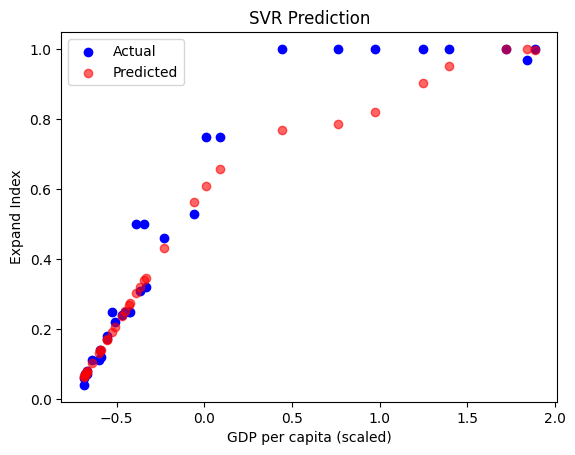

In [41]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('GDP per capita (scaled)')
plt.ylabel('Expand Index')
plt.legend()
plt.title('SVR Prediction')
plt.show()

<b>Preprocess</b>

In [42]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
# Khác
import warnings
warnings.filterwarnings("ignore")

In [43]:
import chardet

with open('GDP.csv', 'rb') as country:
    result = chardet.detect(country.read())

country = pd.read_csv('GDP.csv', encoding=result['encoding'])


with open('dictionary.csv', 'rb') as dic:
    result = chardet.detect(dic.read())

dic = pd.read_csv('dictionary.csv', encoding=result['encoding'])

In [47]:
country, dic


(                 country   gdpp  expand
 0            Afghanistan    553    0.07
 1                Albania   4090    0.24
 2                Algeria   4460    0.24
 3                 Angola   3530    0.20
 4    Antigua and Barbuda  12200    0.55
 ..                   ...    ...     ...
 162              Vanuatu   2970    0.18
 163            Venezuela  13500    0.54
 164              Vietnam   1310    0.09
 165                Yemen   1310    0.09
 166               Zambia   1460    0.09
 
 [167 rows x 3 columns],
   Column Name                                        Description
 0     country                                Name of the country
 1        gdpp  The GDP per capita. Calculated as the Total GD...
 2      expand                       Đánh giá GDP của quốc gia đó)

In [48]:
print("Tổng số các bản ghi trong tập dữ liệu : {}".format(country.shape[0]))
print("Tổng số các cột trong tập dữ liệu : {}".format(country.shape[1]))

Tổng số các bản ghi trong tập dữ liệu : 167
Tổng số các cột trong tập dữ liệu : 3


In [49]:
# Chọn các cột số (numeric)
df_numeric = country.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("Các cột có dữ liệu là số : {}".format(numeric_cols))


# Chọn các cột không phải là số (non - numeric)
df_non_numeric = country.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("Các cột có dữ liệu không phải là số : {}".format(non_numeric_cols))

Các cột có dữ liệu là số : ['gdpp' 'expand']
Các cột có dữ liệu không phải là số : ['country']


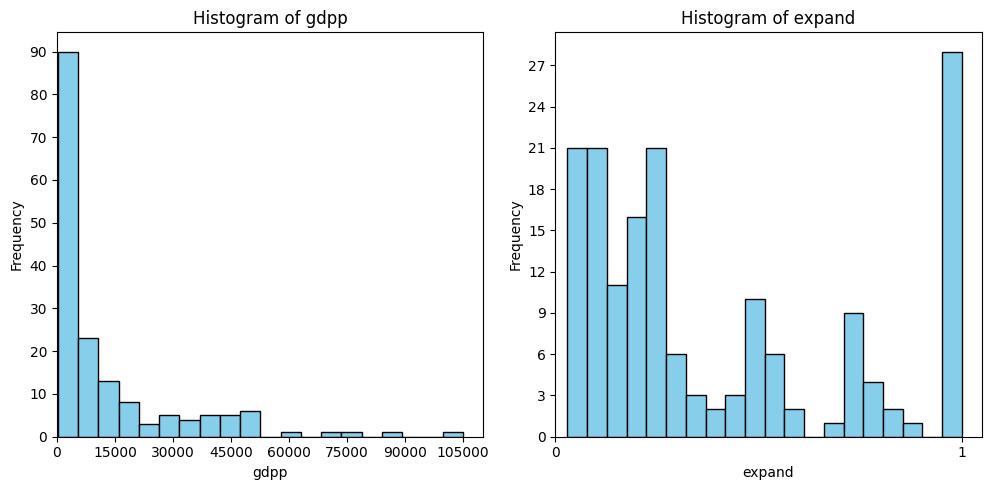

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Giả sử country là DataFrame bạn đã có:
# country = pd.read_csv("du_lieu.csv")

# Chọn các cột số hiện có, tránh lỗi nếu cột không tồn tại
numeric_cols = [col for col in ['gdpp', 'expand'] if col in country.columns]

cols_per_row = 3
num_rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5 * cols_per_row, 5 * num_rows))

# Flatten axes để truy cập thuận tiện
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

# Vẽ histogram
for i, column in enumerate(numeric_cols):
    ax = axes[i]
    ax.hist(country[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.set_title(f"Histogram of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Ẩn các ô trống (nếu có)
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


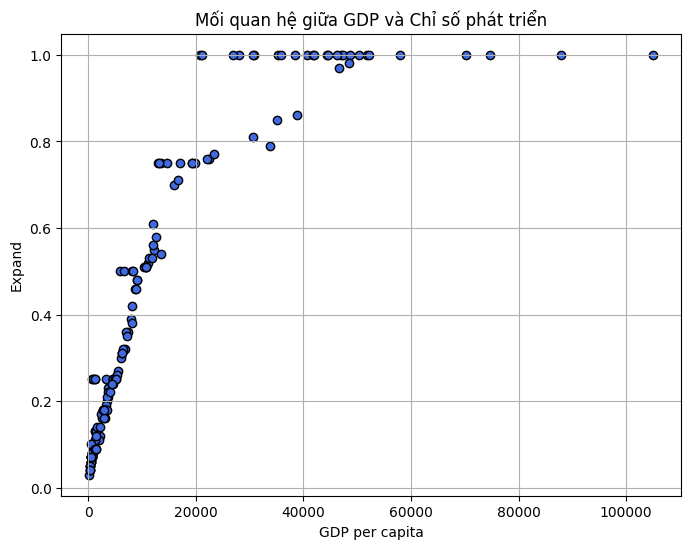

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(country['gdpp'], country['expand'], color='royalblue', edgecolors='k')
plt.title("Mối quan hệ giữa GDP và Chỉ số phát triển")
plt.xlabel("GDP per capita")
plt.ylabel("Expand")
plt.grid(True)
plt.show()


In [58]:
country['expand'].describe()

count    167.000000
mean       0.410599
std        0.337754
min        0.030000
25%        0.125000
50%        0.250000
75%        0.750000
max        1.000000
Name: expand, dtype: float64

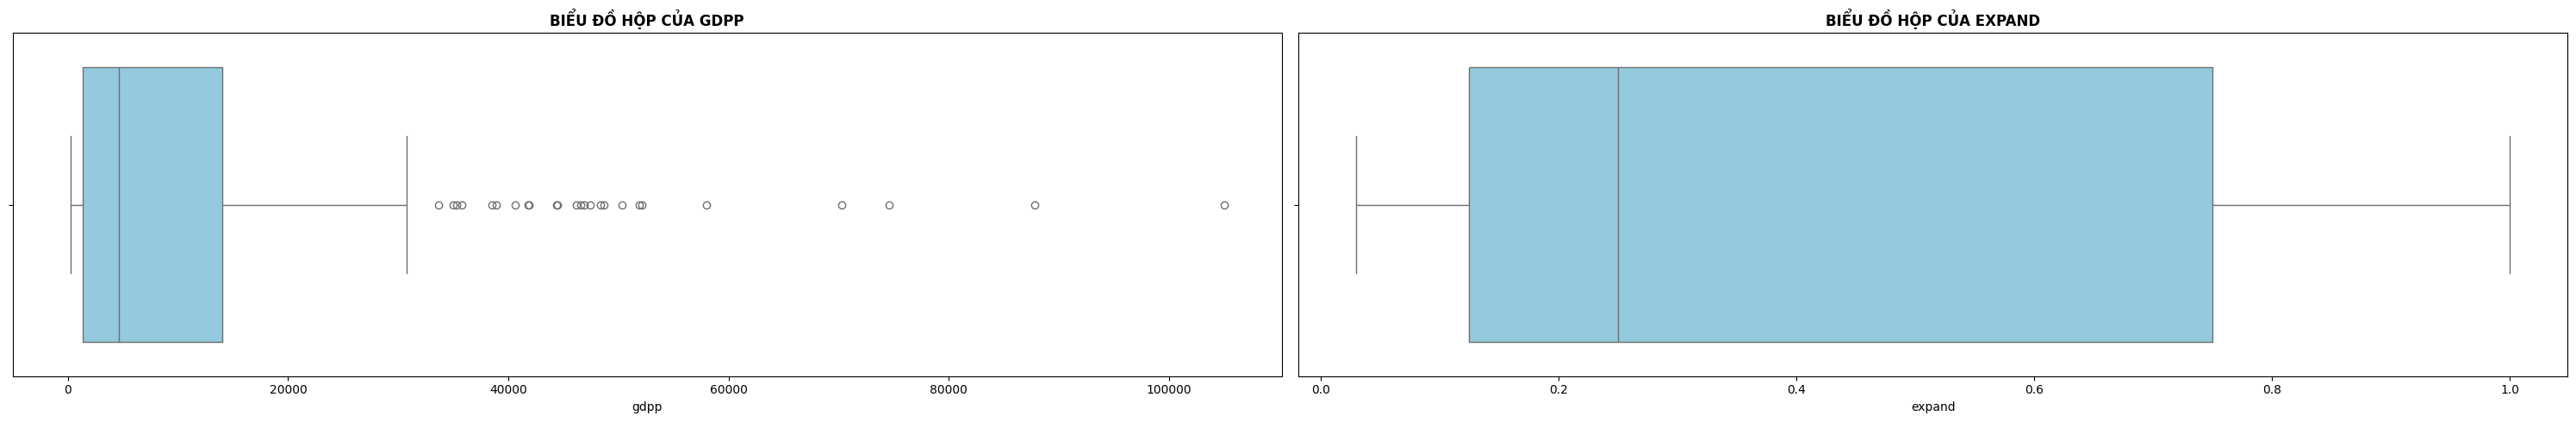

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc cột dạng số
numerical_country = country.select_dtypes(include=['int64', 'float64'])

# Số lượng biến cần vẽ
num_vars = numerical_country.shape[1]

# Tạo subplot phù hợp với số cột
fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(15 * num_vars, 5))

# Nếu chỉ có 1 cột thì axes không phải list
if num_vars == 1:
    axes = [axes]

# Vẽ từng boxplot
for i, column in enumerate(numerical_country.columns):
    sns.boxplot(x=numerical_country[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'BIỂU ĐỒ HỘP CỦA {column.upper()}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [65]:
# Lưu số dòng ban đầu
initial_rows = len(country)

# Tạo một mask để đánh dấu các dòng chứa outlier ở bất kỳ cột nào
outlier_mask = pd.Series([False] * len(country), index=country.index)

# Lặp qua từng cột để cập nhật mask
for column in numerical_country:
    Q1 = country[column].quantile(0.25)
    Q3 = country[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (country[column] < lower_bound) | (country[column] > upper_bound)
    print(f"Số outlier trong '{column}': {outliers.sum()}")
    
    # Cập nhật mask chung
    outlier_mask = outlier_mask | outliers

# Loại bỏ tất cả các dòng có ít nhất một outlier
country = country[~outlier_mask]

# Báo cáo
rows_removed = initial_rows - len(country)
percentage_removed = (rows_removed / initial_rows) * 100
print(f"\nTổng số dòng đã bị loại bỏ: {rows_removed} trên {initial_rows} dòng ({percentage_removed:.2f}%)")


Số outlier trong 'gdpp': 11
Số outlier trong 'expand': 0

Tổng số dòng đã bị loại bỏ: 11 trên 142 dòng (7.75%)


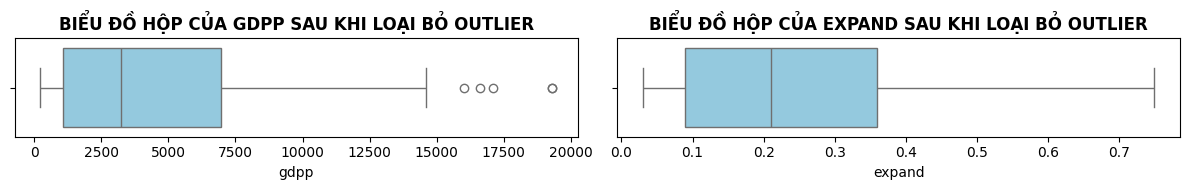

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo lưới subplot với 2 cột
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 2))

# Lặp qua từng cột và vẽ boxplot trong từng ô subplot
for i, column in enumerate(['gdpp', 'expand']):
    sns.boxplot(x=country[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'BIỂU ĐỒ HỘP CỦA {column.upper()} SAU KHI LOẠI BỎ OUTLIER', fontsize=12, fontweight='bold')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()
     

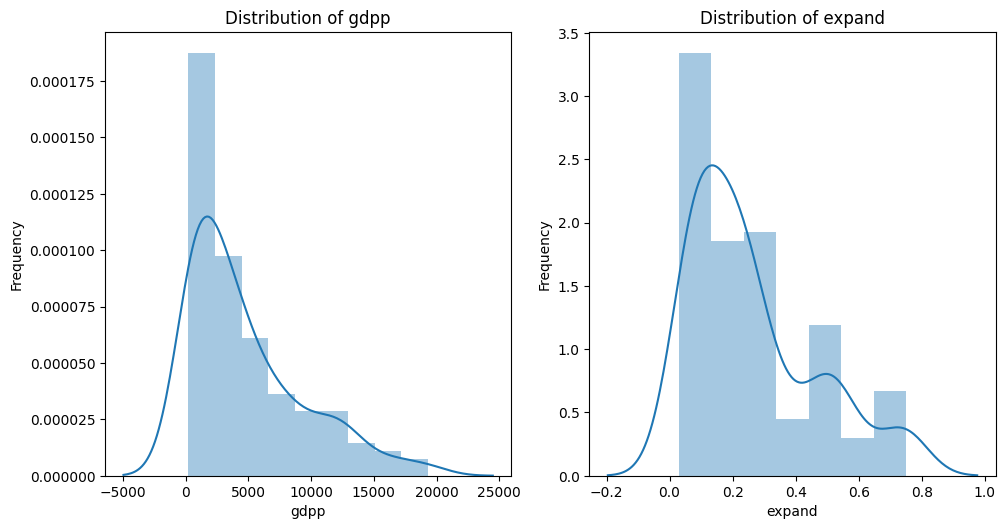

In [84]:
data_numeric = ['gdpp', 'expand']
plt.figure(figsize=(15, 15))
for i, column in enumerate(data_numeric):
    plt.subplot(3, 3, i + 1)
    sns.distplot(country[column], kde=True, hist=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()